UNIVERSIDAD CATÓLICA BOLIVIANA”SAN PABLO”
MAESTRÍA EN CIENCIA DE DATOS V4
MINERÍA DE DATOS 1 
DATASET DE PRACTICA 
ROSSMAN

1.	Quitar filas duplicadas
2.	Quitar columnas duplicadas
3.	Identificar columnas que tienen valores constantes
4.	Identifique el porcentaje de valores faltantes en las columnas
5.	Analice el caso de los atributos que no serían apropiados para en dataset, por medio de gráficas Cuales decidiría usted de transformar o en su caso quitar, con el propósito de mejorar el dataset. Genere las siguientes gráficas:
a.	Histograms
b.	Quartiles
c.	Scatter plots
d.	Distributions
e.	Heartmaps
6.	Obtenga la matriz de correlación de las variables numéricas e identifique si algunas se pudieran quitar.
7.	Mapear Day of Week con los días en literal.
8.	Obtenga la tabla de relación de frecuencias entre los atributos StoreType y Assortment
9.	Mapear el atributo CompetitionOpenSinceMonth con los meses del año en literal y rellenar los valores faltantes “?” con el mes que tenga la mayor frecuencia.
10.	Identifique atributos que no serían de utilidad por su nivel de variación, si hubiera. Usted identifique su nivel de utilidad, dando razones para ello.
11.	Identifique los campos que tienen valores faltantes y decida como reemplazarlos, haciendo un análisis en cada caso.
12.	Obtenga por día de semana (DayOfWeek) el total en ventas (Sales) y ordénelo por ventas en forma descendente.
13.	Obtenga por día de semana (DayOfWeek) y tienda el total y el promedio en ventas (Sales) y ordénelo por ventas en forma ascendente.

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns

In [257]:
'''1.	Quitar filas duplicadas'''
df = pd.read_csv('1_RossmandataV1.csv')
df.head()  

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,107,6,5/23/15,3918,378,1,0,0,0,d,a,0,0.0,0.0,1,5.0,2013.0,"Feb,May,Aug,Nov"
1,492,3,6/5/13,8856,901,1,1,0,0,d,a,0,0.0,0.0,0,NaN,NaN,NaN
2,57,1,12/30/13,5940,577,1,0,0,1,a,c,0,0.0,0.0,0,NaN,NaN,NaN
3,260,5,1/2/15,4311,439,1,0,0,1,a,c,0,0.0,0.0,0,NaN,NaN,NaN
4,932,4,4/4/13,3294,345,1,0,0,1,d,a,0,0.0,0.0,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [201]:
df.duplicated().sum()

duplicated_rows = df.duplicated()
if duplicated_rows.any():
    print("Existen filas duplicadas")
else:
    print("No existen filas duplicadas")
    
duplicated_cols = df.columns[df.columns.duplicated(keep=False)]
if len(duplicated_cols) > 0:
    print('Existen columnas duplicadas:', list(duplicated_cols))
else:
    print('No hay columnas duplicadas')

print(df.isnull().sum(),'\n')

No existen filas duplicadas
No hay columnas duplicadas
Store                           0
DayOfWeek                       0
Date                            0
Sales                           0
Customers                       0
Open                            0
Promo                           0
StateHoliday                    0
SchoolHoliday                   0
StoreType                       0
Assortment                      0
CompetitionDistance             0
CompetitionOpenSinceMonth    1529
CompetitionOpenSinceYear     1529
Promo2                          0
Promo2SinceWeek              2497
Promo2SinceYear              2497
PromoInterval                2497
dtype: int64 



In [202]:
'''3.	Identificar columnas que tienen valores constantes'''

df_num = df.select_dtypes(include=['int64','float64'])
df_int64 = df.select_dtypes(include=['int64'])
df_float64 = df.select_dtypes(include=['float64'])
df_obj = df.select_dtypes(include=['object'])
print(df_int64.dtypes, df_float64.dtypes, df_obj.dtypes, sep='\n')

Store                  int64
DayOfWeek              int64
Sales                  int64
Customers              int64
Open                   int64
Promo                  int64
SchoolHoliday          int64
CompetitionDistance    int64
Promo2                 int64
dtype: object
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2SinceWeek              float64
Promo2SinceYear              float64
dtype: object
Date             object
StateHoliday     object
StoreType        object
Assortment       object
PromoInterval    object
dtype: object


In [203]:
'''4.	Identifique el porcentaje de valores faltantes en las columnas'''

for i in df.columns:
    if df[i].isnull().sum() == 0:
        pass
    else:
        print(i,'{:.2f}%'.format(df[i].isnull().sum()/len(df[i])*100),df[i].dtype)

CompetitionOpenSinceMonth 30.58% float64
CompetitionOpenSinceYear 30.58% float64
Promo2SinceWeek 49.94% float64
Promo2SinceYear 49.94% float64
PromoInterval 49.94% object


In [204]:
print("Existen:",df['PromoInterval'].nunique(),"Valores porsibles",'\n',df['PromoInterval'].unique())

Existen: 3 Valores porsibles 
 ['Feb,May,Aug,Nov' nan 'Jan,Apr,Jul,Oct' 'Mar,Jun,Sept,Dec']


In [205]:
#Transformar PromoInterval a numerico

df['PromoInterval'] = df['PromoInterval'].replace({'Jan,Apr,Jul,Oct':1,'Feb,May,Aug,Nov':2,'Mar,Jun,Sept,Dec':3})
print("Existen:",df['PromoInterval'].nunique(),"Valores porsibles",'\n',df['PromoInterval'].unique(),'\n',df['PromoInterval'].dtypes,'\n')
df_float64 = df.select_dtypes(include=['float64'])
print(df_float64.dtypes, sep='\n')

Existen: 3 Valores porsibles 
 [ 2. nan  1.  3.] 
 float64 

CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                float64
dtype: object


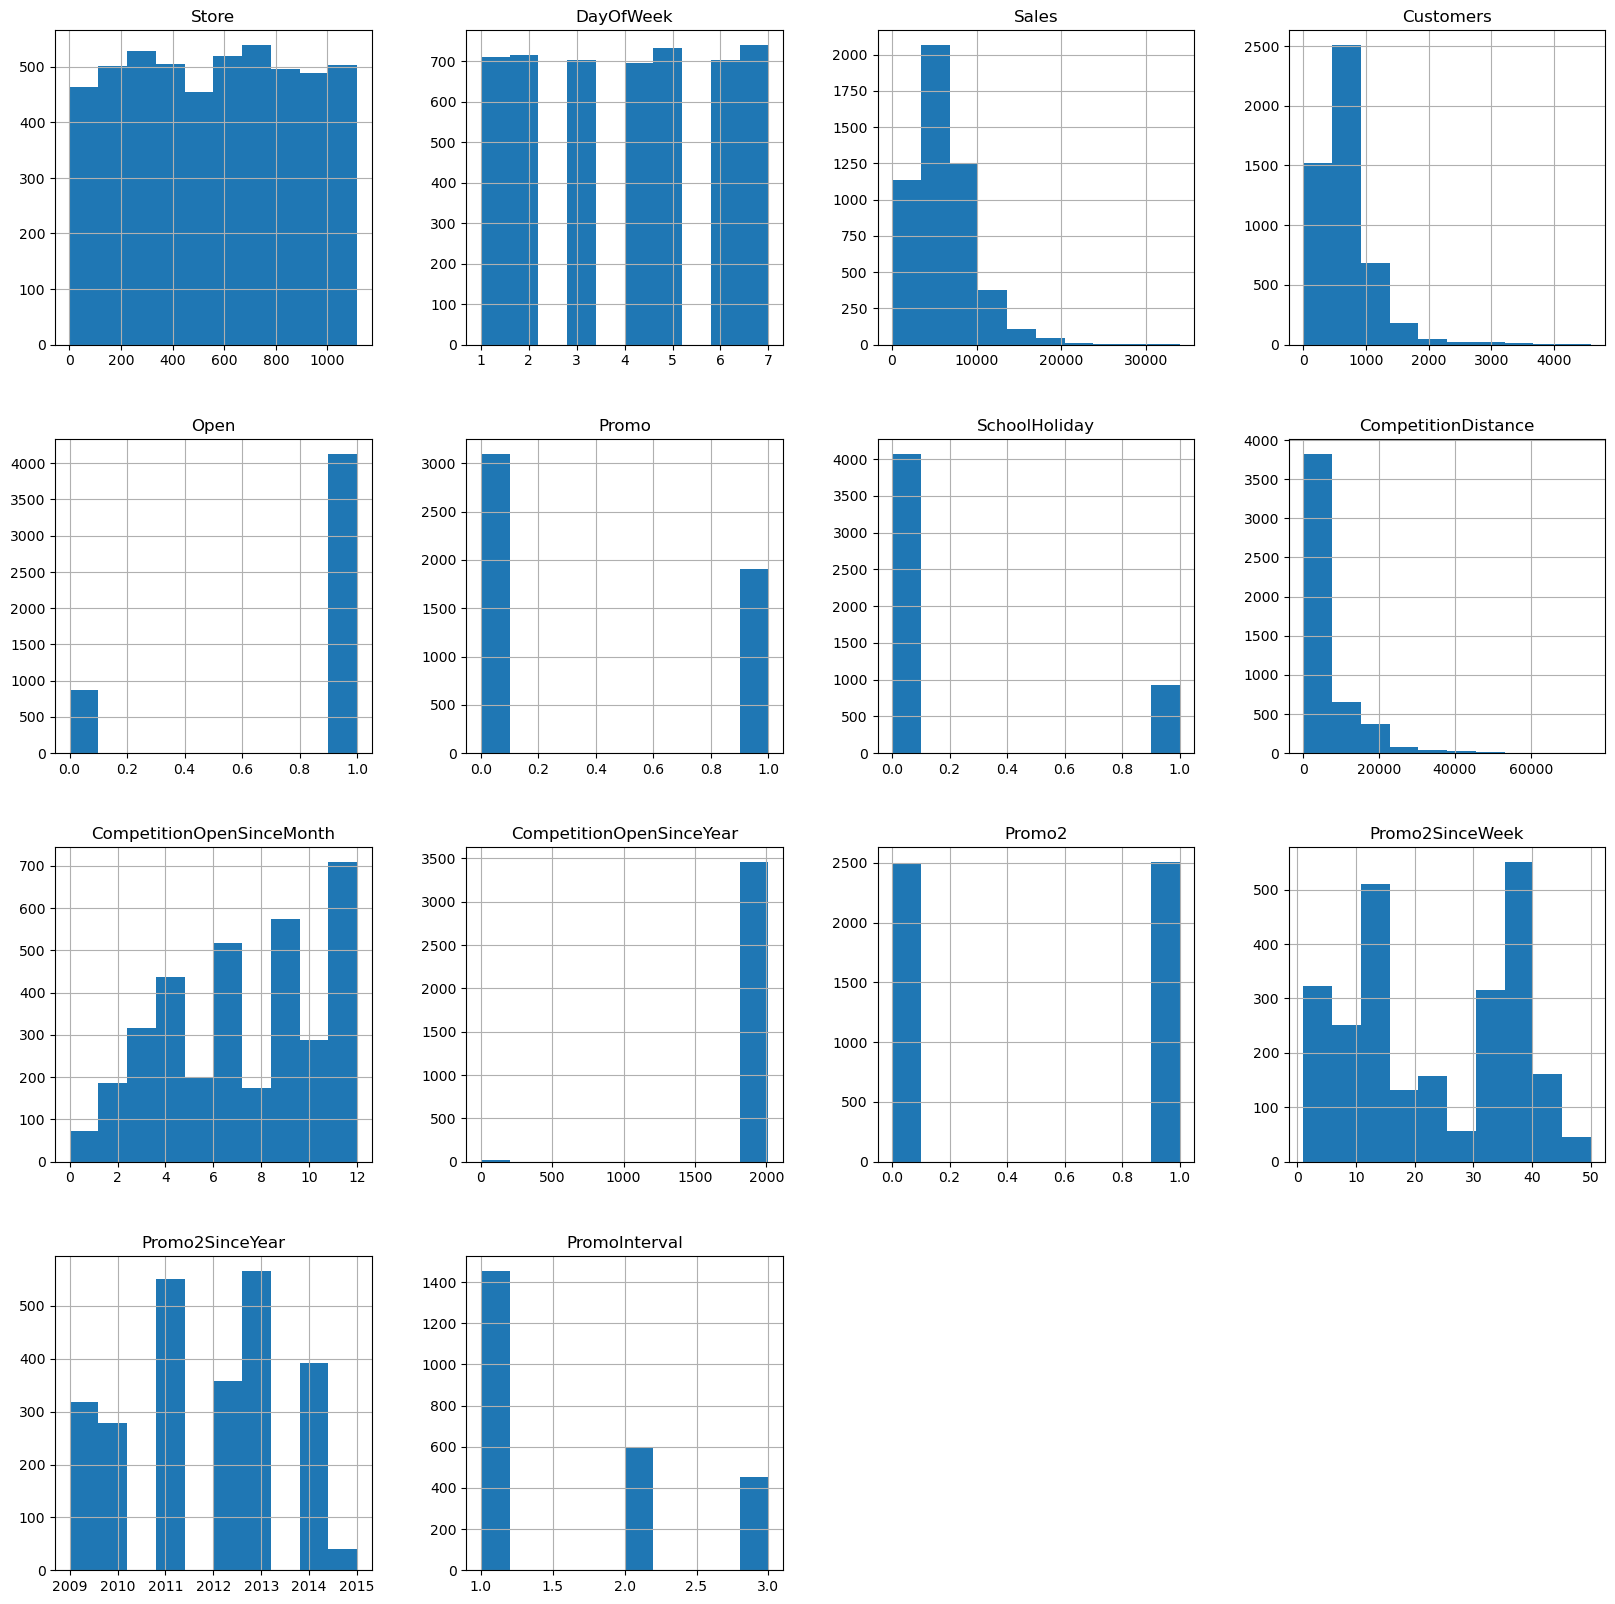

In [206]:
'''5.	Analice el caso de los atributos que no serían apropiados para en dataset, por medio de gráficas Cuales decidiría usted de transformar o en su caso quitar, con el propósito de mejorar el dataset. Genere las siguientes gráficas:
a.	Histograms
b.	Quartiles
c.	Scatter plots
d.	Distributions
e.	Heatmaps'''
hist = df.hist(figsize=(20,20))

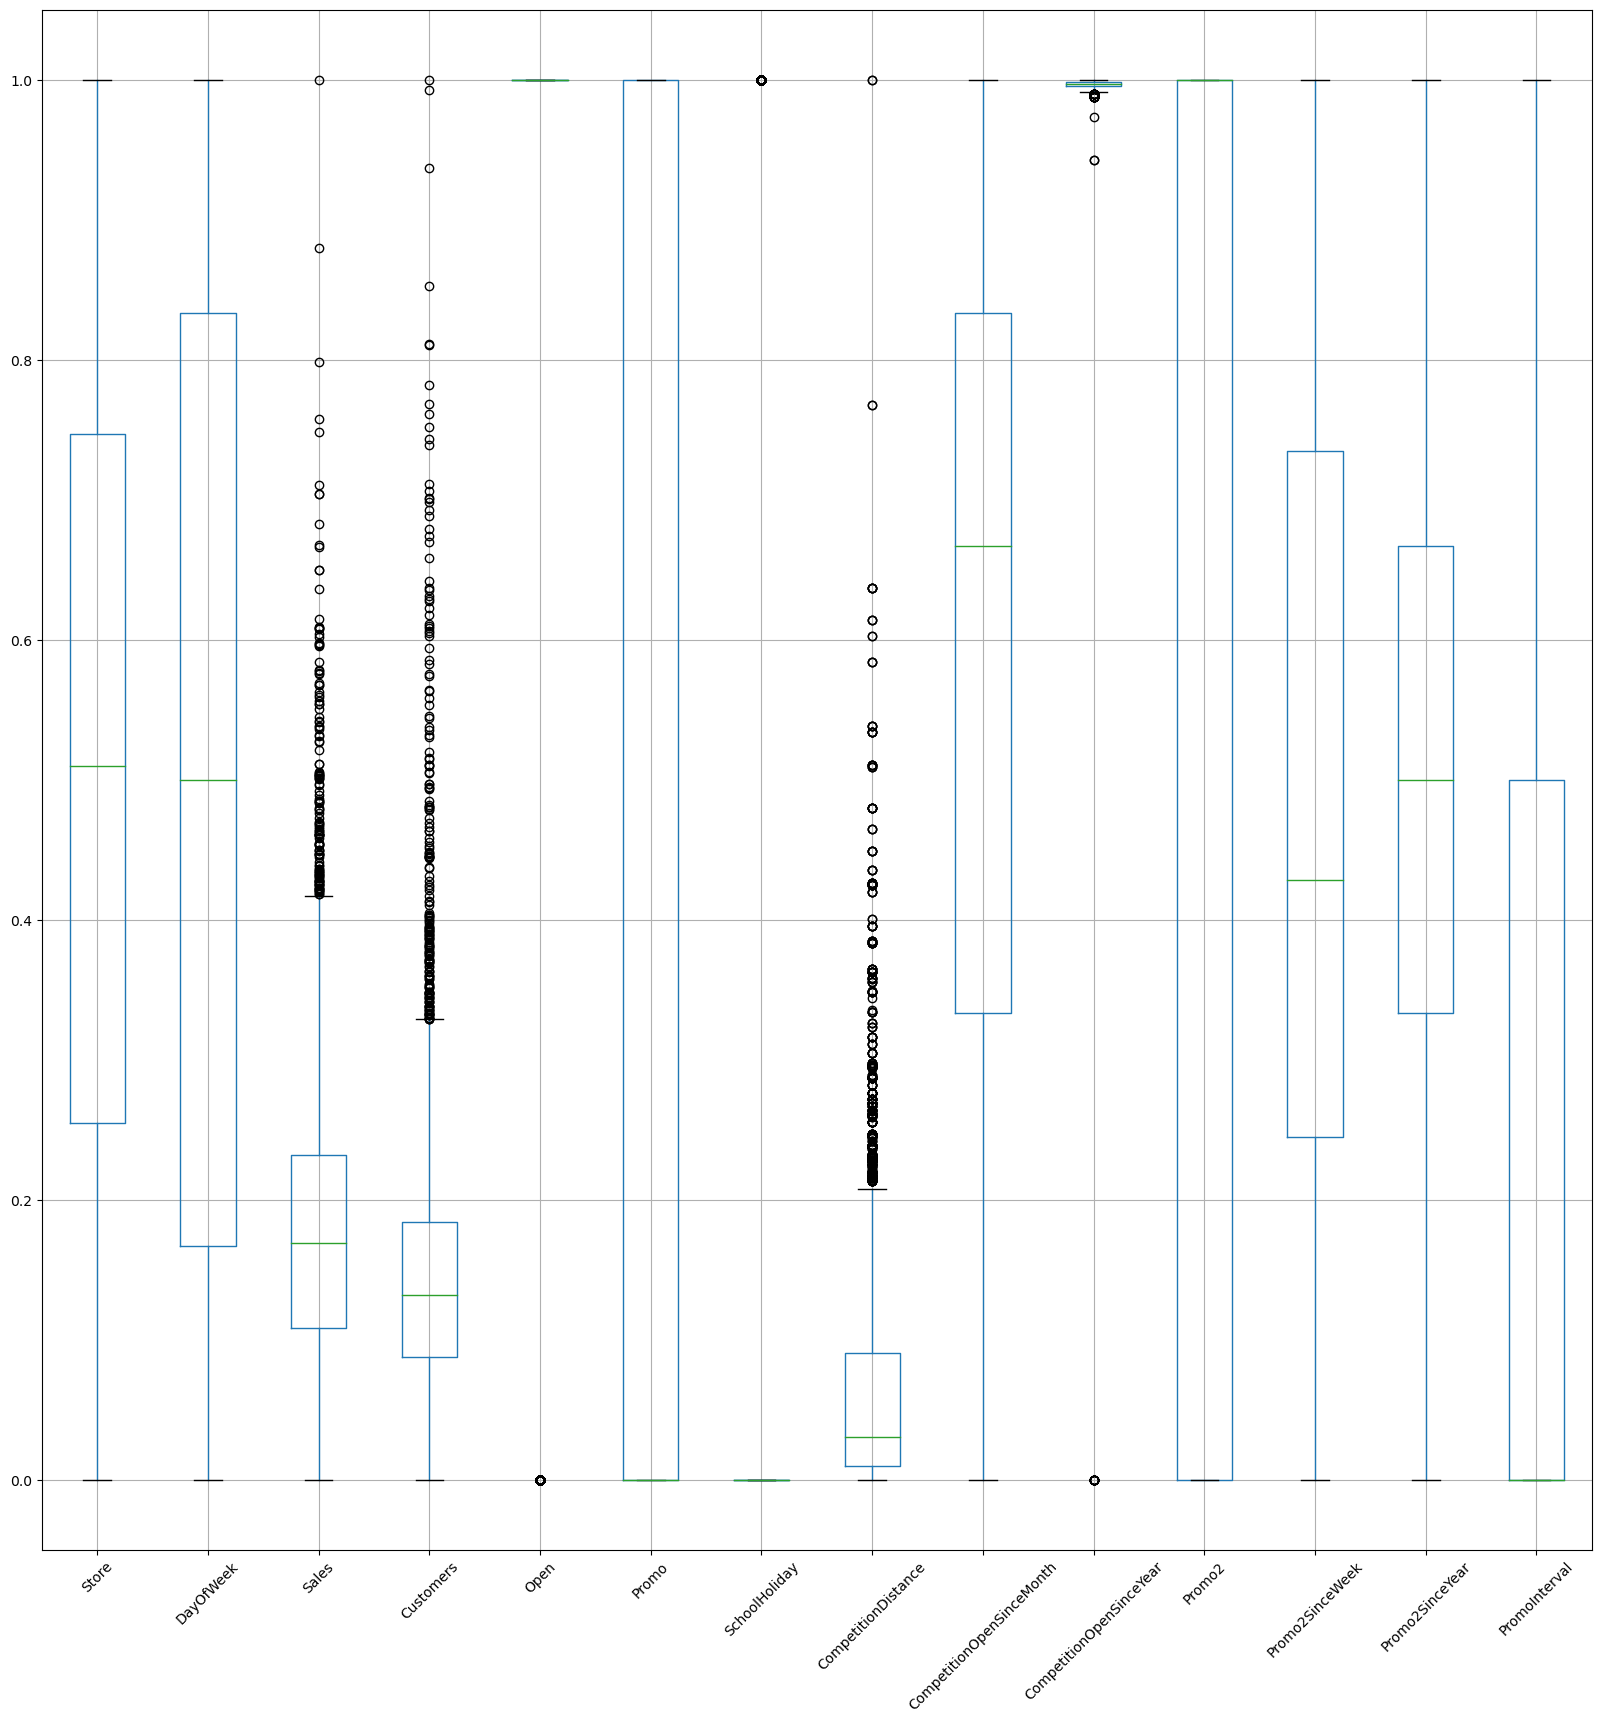

In [207]:
df_num = df.select_dtypes(include=['int64','float64'])
df_norm = (df_num - df_num.min()) / (df_num.max() - df_num.min())
boxplot = df_norm.boxplot(figsize=(20,20), rot=45)

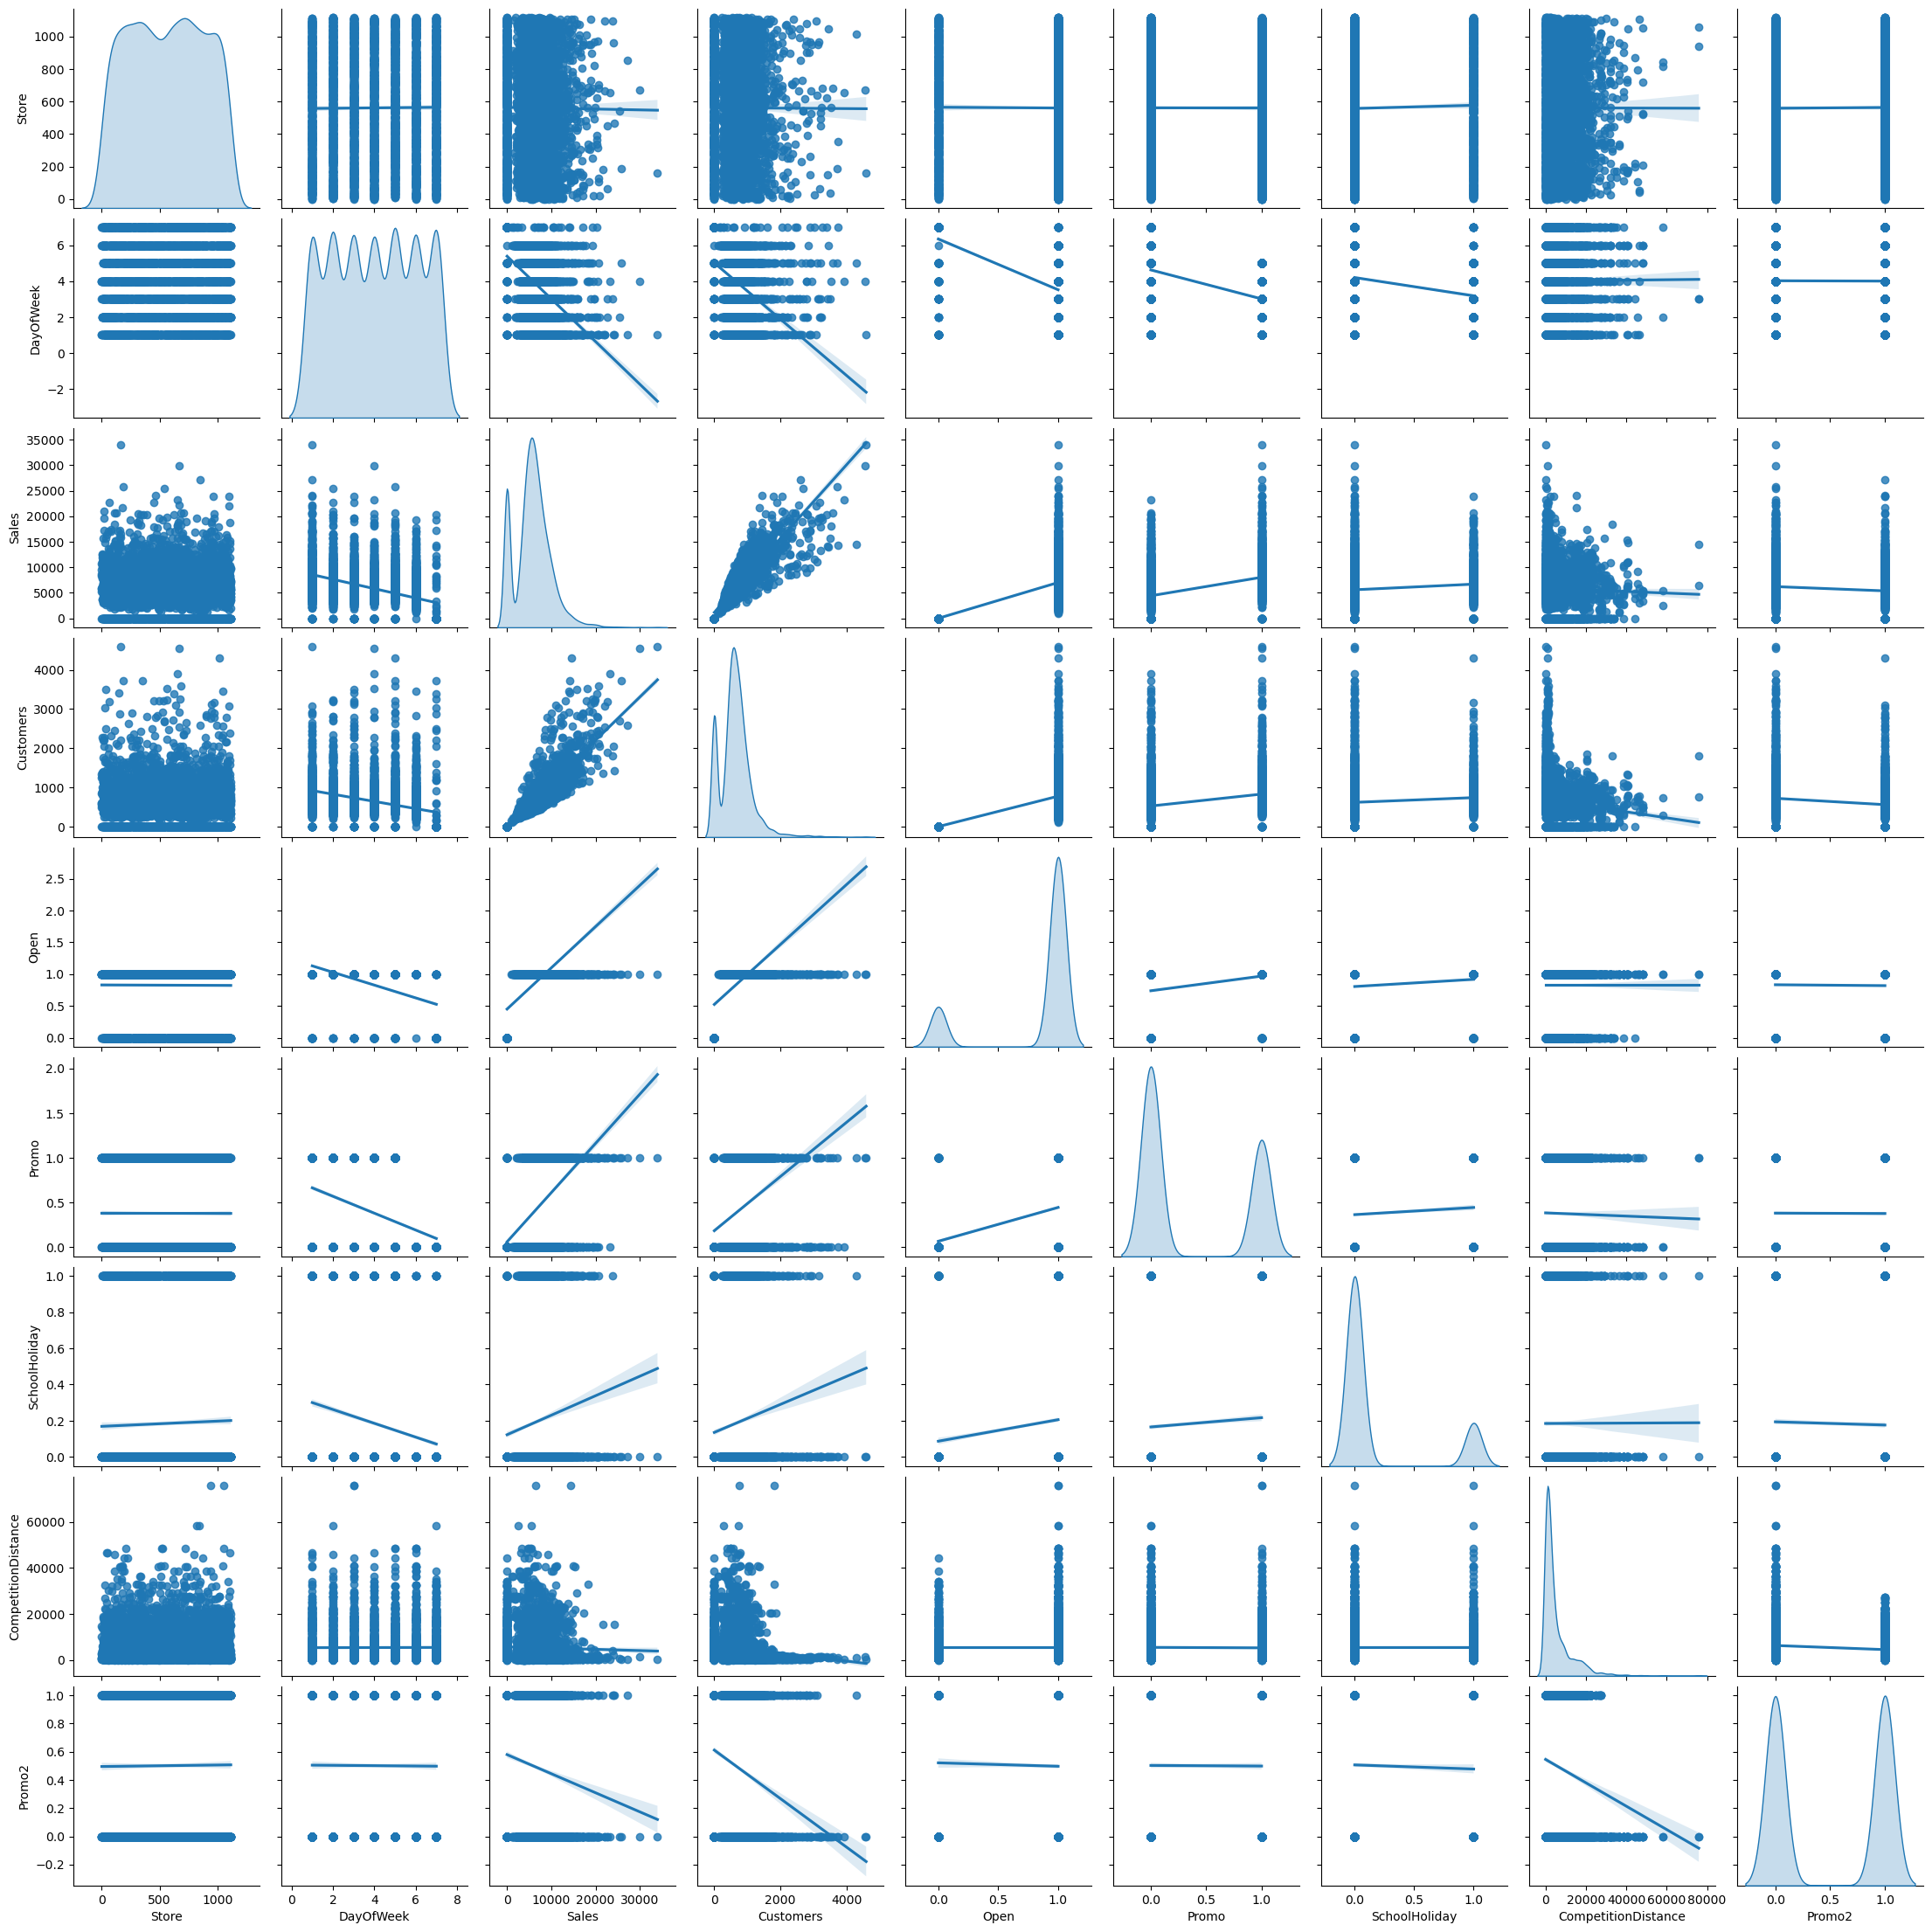

In [208]:
scatter = sb.pairplot(df_int64, kind='reg', diag_kind='kde', height=2.5)

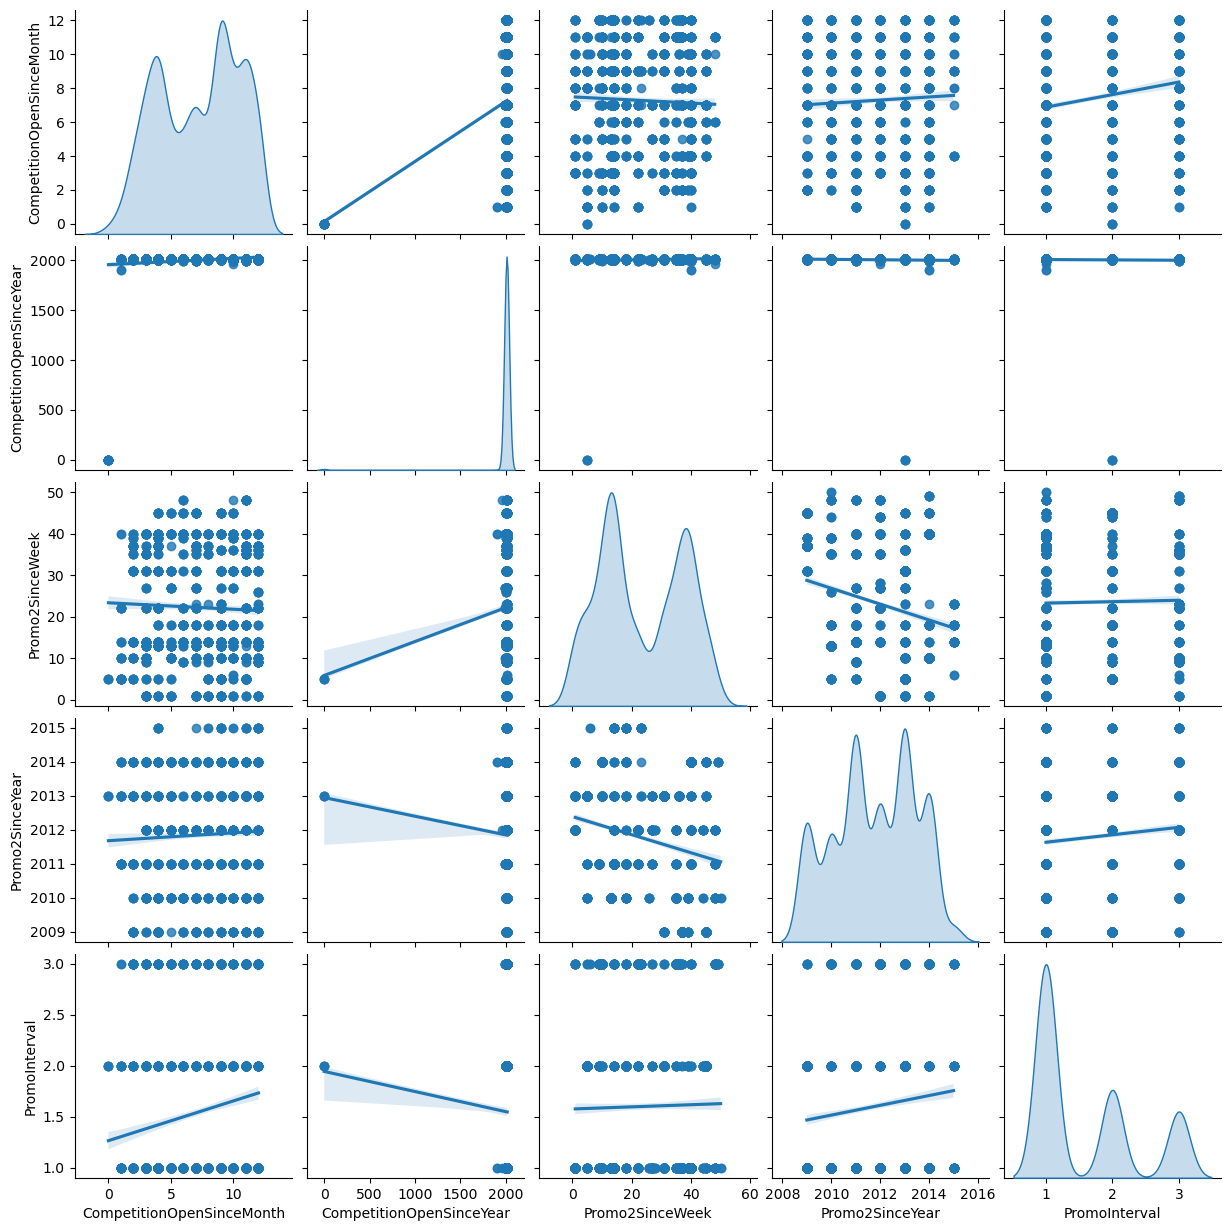

In [209]:
scatter = sb.pairplot(df_float64, kind='reg', diag_kind='kde', height=2.5)

In [210]:
df['Date_reformat'] = df['Date']
df['fecha_pd_format'] = pd.to_datetime(df['Date_reformat'])
print(df[['fecha_pd_format']].head(5),'\n')
df['year_pd_format']=df['fecha_pd_format'].dt.year
print(df[['year_pd_format']].head(5),'\n')
print("Existen:",df['year_pd_format'].nunique(),"Valores porsibles",'\n',df['year_pd_format'].unique(),'\n',df['year_pd_format'].dtypes,'\n')


  fecha_pd_format
0      2015-05-23
1      2013-06-05
2      2013-12-30
3      2015-01-02
4      2013-04-04 

   year_pd_format
0            2015
1            2013
2            2013
3            2015
4            2013 

Existen: 3 Valores porsibles 
 [2015 2013 2014] 
 int64 



In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Store                      5000 non-null   int64         
 1   DayOfWeek                  5000 non-null   int64         
 2   Date                       5000 non-null   object        
 3   Sales                      5000 non-null   int64         
 4   Customers                  5000 non-null   int64         
 5   Open                       5000 non-null   int64         
 6   Promo                      5000 non-null   int64         
 7   StateHoliday               5000 non-null   object        
 8   SchoolHoliday              5000 non-null   int64         
 9   StoreType                  5000 non-null   object        
 10  Assortment                 5000 non-null   object        
 11  CompetitionDistance        5000 non-null   int64         
 12  Compet

In [212]:
df_obj = df.select_dtypes(include=['object'])
print(df_obj.dtypes, sep='\n')

Date             object
StateHoliday     object
StoreType        object
Assortment       object
Date_reformat    object
dtype: object


StateHoliday    object
StoreType       object
Assortment      object
dtype: object


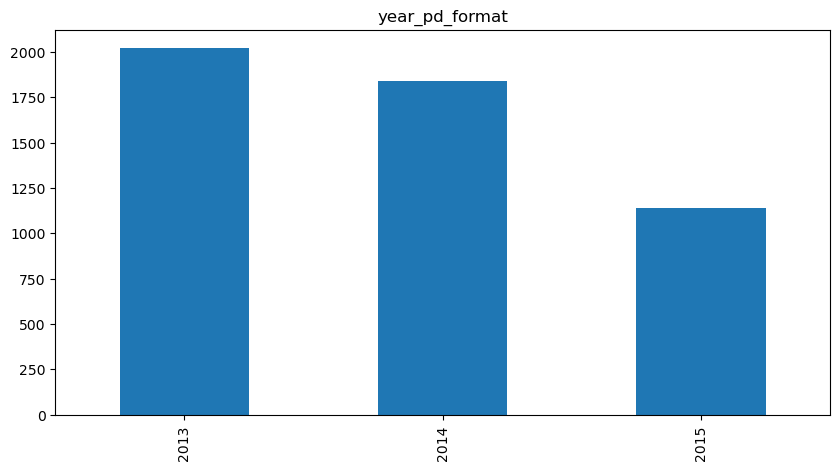

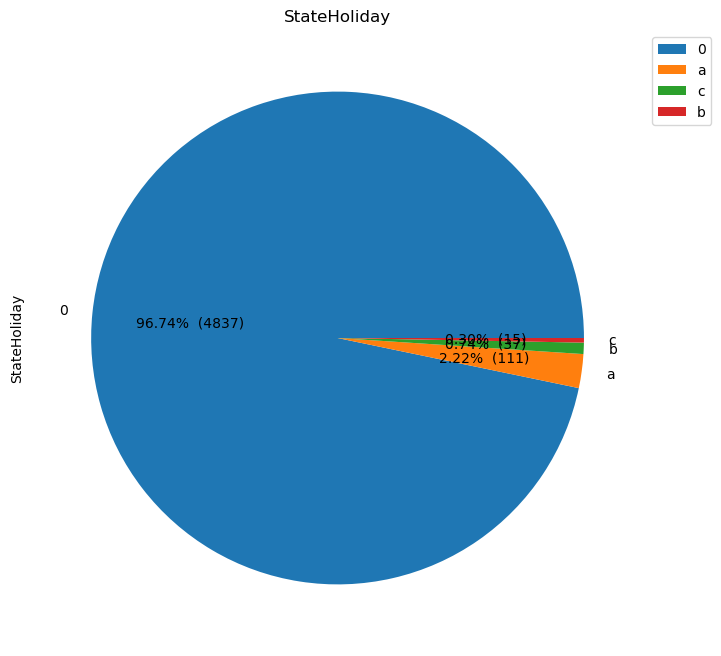

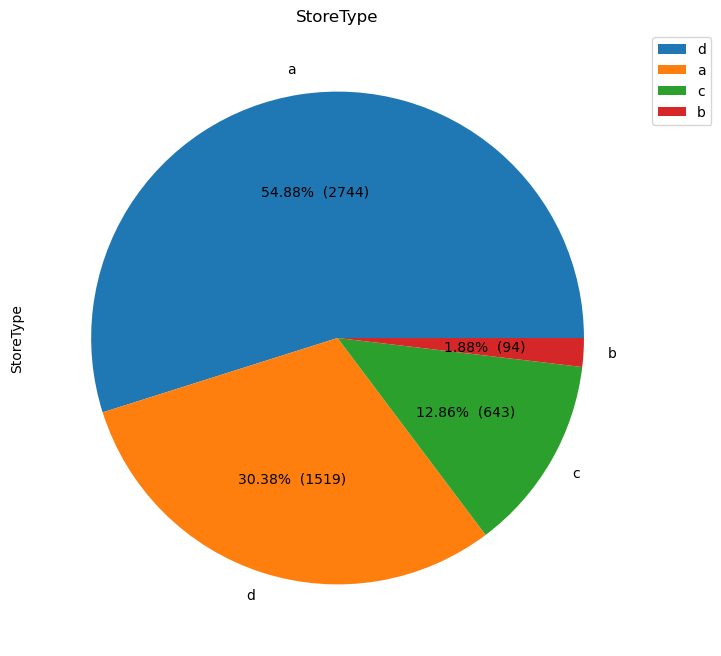

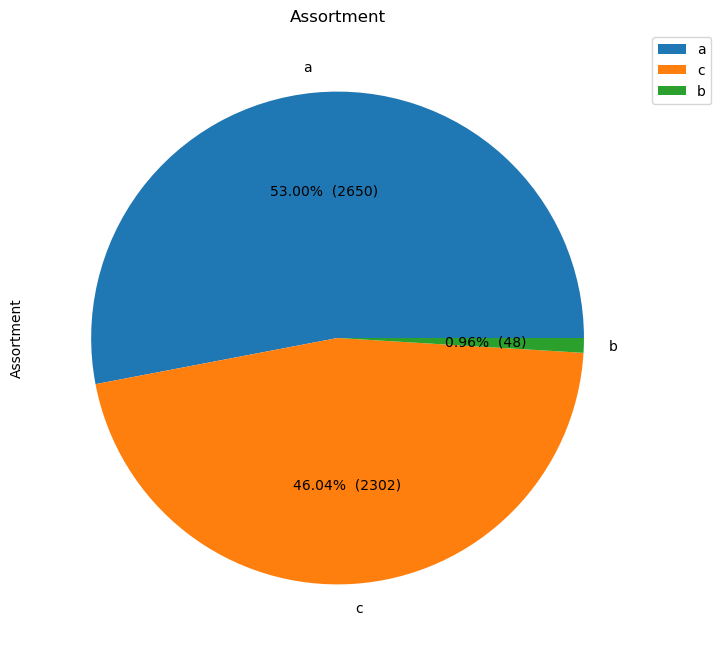

In [213]:
df_obj_select = df_obj.iloc[:,1:4]
print(df_obj_select.dtypes, sep='\n')

df['year_pd_format'].value_counts().plot(kind='bar',figsize=(10,5))
plt.title('year_pd_format')
plt.show()

for i in df_obj_select.columns:

    def my_autopct(pct):
        total = sum(df_obj[i].value_counts())
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    
    df_obj_select[i].value_counts().plot(kind='pie',figsize=(15,8),autopct=lambda pct: my_autopct(pct)).legend(labels=df_obj_select[i].unique(), loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.title(i)
    plt.show()


C:\Users\dell_\AppData\Local\Temp\ipykernel_16496\3939817381.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


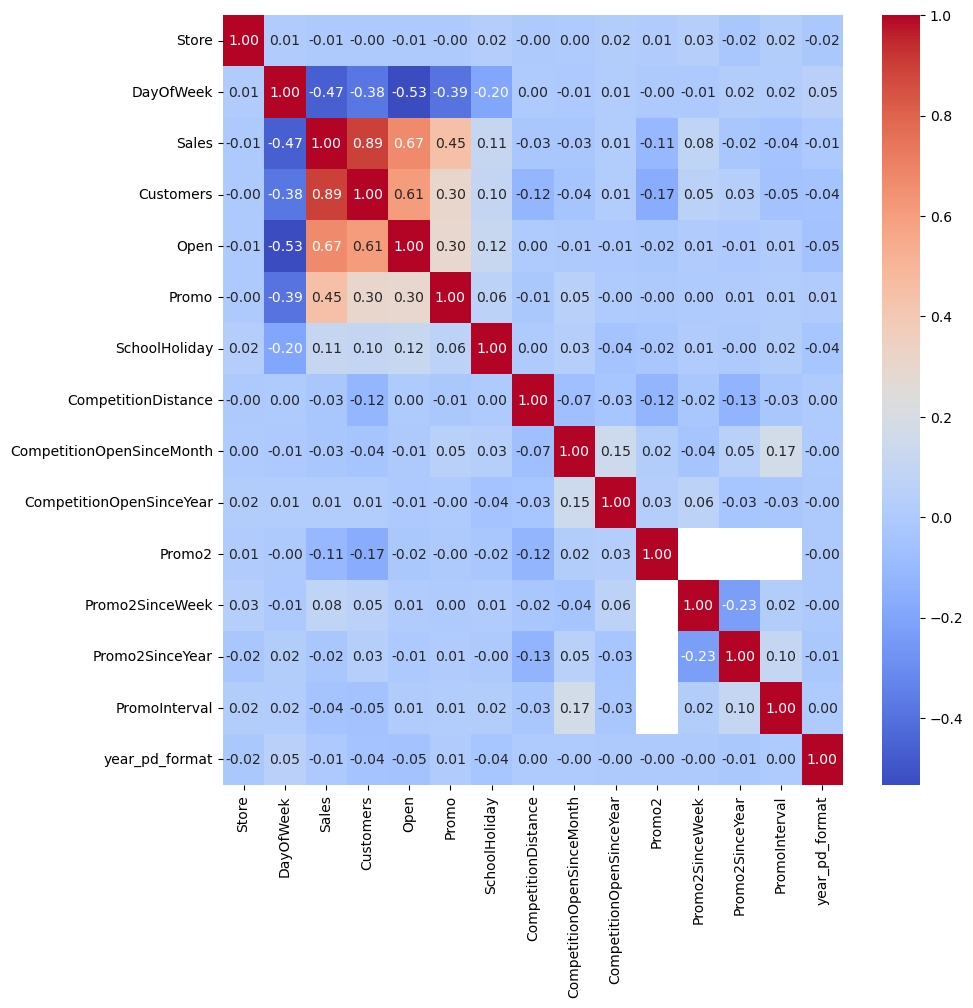

In [214]:
corr = df.corr()
plt.figure(figsize=(10, 10))
sb.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

###TOMA DE DECISION
*Existe una correlacion interesante entre ['Day of the week', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday'], siendo ['SchoolHoliday'] la que es mas debil, no obstante el resto de variables tiene poco o nada de impacto, por lo que ['Store', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval' 'year_pd_format'] pueden considerase no importantes


In [215]:
'''6.	Obtenga la matriz de correlación de las variables numéricas e identifique si algunas se pudieran quitar.'''
corr_matrix = df_num.corr()
corr_matrix.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,11.000000,13.000000,13.000000,13.000000
mean,0.076933,-0.066201,0.179328,0.160216,0.151920,0.126524,0.085968,0.031561,0.090765,0.081922,0.055028,0.074737,0.059149,0.094196
std,0.266068,0.369772,0.416216,0.401848,0.380787,0.317884,0.274352,0.282723,0.270331,0.268687,0.319812,0.287856,0.294115,0.278706
min,-0.021478,-0.533832,-0.466284,-0.379915,-0.533832,-0.390240,-0.196871,-0.127675,-0.070386,-0.044086,-0.167134,-0.225297,-0.225297,-0.051052
25%,-0.001822,-0.334154,-0.028730,-0.048223,-0.008016,-0.000926,-0.001301,-0.061470,-0.022592,-0.021774,-0.064574,-0.008108,-0.022570,-0.026163
50%,0.004159,-0.006412,0.002747,0.023094,0.004910,0.011408,0.023401,-0.024649,0.009757,0.011908,-0.004891,0.009817,-0.002074,0.016349
75%,0.021970,0.010821,0.362110,0.251791,0.250582,0.237633,0.088488,-0.000184,0.046130,0.024993,0.012355,0.054363,0.032426,0.023144
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [216]:
'''7.	Mapear Day of Week con los días en literal.'''

print("Existen:",df['DayOfWeek'].nunique(),"Valores porsibles",'\n',df['DayOfWeek'].unique(),'\n',df['DayOfWeek'].dtypes,'\n')
df['DayOfWeek'] = df['DayOfWeek'].replace({1:'L',2:'Ma',3:'Mi',4:'J',5:'V',6:'S',7:'D'})
print("Existen:",df['DayOfWeek'].nunique(),"Valores porsibles",'\n',df['DayOfWeek'].unique(),'\n',df['DayOfWeek'].dtypes,'\n')

Existen: 7 Valores porsibles 
 [6 3 1 5 4 2 7] 
 int64 

Existen: 7 Valores porsibles 
 ['S' 'Mi' 'L' 'V' 'J' 'Ma' 'D'] 
 object 



In [217]:
'''8.	Obtenga la tabla de relación de frecuencias entre los atributos StoreType y Assortment'''

print(pd.crosstab(df['StoreType'], df['Assortment']))

Assortment     a   b     c
StoreType                 
a           1718   0  1026
b             39  48     7
c            306   0   337
d            587   0   932


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Store                      5000 non-null   int64         
 1   DayOfWeek                  5000 non-null   object        
 2   Date                       5000 non-null   object        
 3   Sales                      5000 non-null   int64         
 4   Customers                  5000 non-null   int64         
 5   Open                       5000 non-null   int64         
 6   Promo                      5000 non-null   int64         
 7   StateHoliday               5000 non-null   object        
 8   SchoolHoliday              5000 non-null   int64         
 9   StoreType                  5000 non-null   object        
 10  Assortment                 5000 non-null   object        
 11  CompetitionDistance        5000 non-null   int64         
 12  Compet

In [219]:
df = df.drop(['Date_reformat', 'fecha_pd_format', 'year_pd_format'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      5000 non-null   int64  
 1   DayOfWeek                  5000 non-null   object 
 2   Date                       5000 non-null   object 
 3   Sales                      5000 non-null   int64  
 4   Customers                  5000 non-null   int64  
 5   Open                       5000 non-null   int64  
 6   Promo                      5000 non-null   int64  
 7   StateHoliday               5000 non-null   object 
 8   SchoolHoliday              5000 non-null   int64  
 9   StoreType                  5000 non-null   object 
 10  Assortment                 5000 non-null   object 
 11  CompetitionDistance        5000 non-null   int64  
 12  CompetitionOpenSinceMonth  3471 non-null   float64
 13  CompetitionOpenSinceYear   3471 non-null   float

In [220]:
print("Existen:",df['CompetitionOpenSinceMonth'].nunique(),"Valores posibles",'\n',df['CompetitionOpenSinceMonth'].unique(),'\n',df['CompetitionOpenSinceMonth'].dtypes,'\n')

Existen: 13 Valores posibles 
 [ 0.  4.  8.  9.  2. nan  3. 11.  7. 12.  5. 10.  6.  1.] 
 float64 



In [221]:
'''9.	Mapear el atributo CompetitionOpenSinceMonth con los meses del año en literal y rellenar los valores faltantes “?” con el mes que tenga la mayor frecuencia.'''

df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].replace({1:'Enero',2:'Febrero',3:'Marzo',4:'Abril',5:'Mayo',6:'Junio',7:'Julio',8:'Agosto',9:'Septiembre',10:'Octubre',11:'Noviembre',12:'Diciembre'})
print("Existen:",df['CompetitionOpenSinceMonth'].nunique(),"Valores posibles",'\n',df['CompetitionOpenSinceMonth'].unique(),'\n',df['CompetitionOpenSinceMonth'].dtypes)
freq = df['CompetitionOpenSinceMonth'].value_counts()
most_freq = df['CompetitionOpenSinceMonth'].value_counts().idxmax()
print(df['CompetitionOpenSinceMonth'].value_counts(),'\n','El mes mas frecuente es:',most_freq,'\n')

Existen: 13 Valores posibles 
 [0.0 'Abril' 'Agosto' 'Septiembre' 'Febrero' nan 'Marzo' 'Noviembre'
 'Julio' 'Diciembre' 'Mayo' 'Octubre' 'Junio' 'Enero'] 
 object
Septiembre    573
Abril         438
Noviembre     415
Marzo         316
Julio         310
Diciembre     293
Octubre       287
Junio         207
Mayo          198
Febrero       187
Agosto        175
Enero          56
0.0            16
Name: CompetitionOpenSinceMonth, dtype: int64 
 El mes mas frecuente es: Septiembre 



In [228]:
df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].replace({0.0:'Enero_2'})
df['CompetitionOpenSinceMonth'].fillna(most_freq, inplace=True)
print("Existen:",df['CompetitionOpenSinceMonth'].nunique(),"Valores posibles",'\n',df['CompetitionOpenSinceMonth'].unique(),'\n',df['CompetitionOpenSinceMonth'].dtypes)

Existen: 13 Valores porsibles 
 ['Enero_2' 'Abril' 'Agosto' 'Septiembre' 'Febrero' 'Marzo' 'Noviembre'
 'Julio' 'Diciembre' 'Mayo' 'Octubre' 'Junio' 'Enero'] 
 object


In [240]:
'''10.	Identifique atributos que no serían de utilidad por su nivel de variación, si hubiera. Usted identifique su nivel de utilidad, dando razones para ello.'''
variances = df_num.var()
std = df_num.std()
mean = df_num.mean()
print(mean,'\n')

Store                         560.837600
DayOfWeek                       4.017400
Sales                        5793.839800
Customers                     640.919400
Open                            0.826000
Promo                           0.380400
SchoolHoliday                   0.185400
CompetitionDistance          5346.830000
CompetitionOpenSinceMonth       7.214059
CompetitionOpenSinceYear     1999.486027
Promo2                          0.500600
Promo2SinceWeek                23.469437
Promo2SinceYear              2011.763084
PromoInterval                   1.599281
dtype: float64 



In [241]:
print(std,'\n')

Store                         319.748197
DayOfWeek                       2.008159
Sales                        3942.027305
Customers                     486.002465
Open                            0.379147
Promo                           0.485534
SchoolHoliday                   0.388661
CompetitionDistance          7363.726322
CompetitionOpenSinceMonth       3.235607
CompetitionOpenSinceYear      136.183978
Promo2                          0.500050
Promo2SinceWeek                14.025491
Promo2SinceYear                 1.658554
PromoInterval                   0.775081
dtype: float64 



In [242]:
print(variances,'\n')

Store                        1.022389e+05
DayOfWeek                    4.032704e+00
Sales                        1.553958e+07
Customers                    2.361984e+05
Open                         1.437528e-01
Promo                        2.357430e-01
SchoolHoliday                1.510571e-01
CompetitionDistance          5.422447e+07
CompetitionOpenSinceMonth    1.046915e+01
CompetitionOpenSinceYear     1.854608e+04
Promo2                       2.500496e-01
Promo2SinceWeek              1.967144e+02
Promo2SinceYear              2.750803e+00
PromoInterval                6.007509e-01
dtype: float64 



La desviación estándar alta y la varianza alta son indicadores de que los valores en una variable están muy dispersos, lo que significa que los datos están muy alejados del valor promedio. Esta dispersión puede hacer que la variable sea difícil de analizar o que los resultados sean menos precisos, ya que las desviaciones extremas pueden afectar significativamente la medida del promedio. Además, una varianza alta también puede indicar una alta sensibilidad a los valores atípicos o extremos, lo que significa que una pequeña cantidad de datos anómalos puede afectar significativamente la medida de la variable. En general, una desviación estándar y una varianza alta pueden indicar una variable con baja calidad de datos, lo que significa que es posible que no sea útil para ciertos tipos de análisis o que se requiere una transformación de los datos para su uso adecuado, por lo tanto variables como sale y CompetitionDistance no son las mas adecuadas en el estudio, lo que cuadra en cierto nivel con lo ya discutido en el punto 5.

In [251]:
'''11.	Identifique los campos que tienen valores faltantes y decida como reemplazarlos, haciendo un análisis en cada caso.'''

#El feature CompetitionOpenSinceMonth ya fue tratado en el punto 9
for i in df.columns:
    if df[i].isnull().sum() == 0:
        pass
    else:
        print(i,'{:.2f}%'.format(df[i].isnull().sum()/len(df[i])*100),'Con un tipo de dato: ',df[i].dtype,'Con un rango de: ',df[i].min(),'-',df[i].max(),'con valores',df[i].nunique(),'unicos')



CompetitionOpenSinceYear 30.58% Con un tipo de dato:  float64 Con un rango de:  0.0 - 2015.0 con valores 24 unicos
Promo2SinceWeek 49.94% Con un tipo de dato:  float64 Con un rango de:  1.0 - 50.0 con valores 24 unicos
Promo2SinceYear 49.94% Con un tipo de dato:  float64 Con un rango de:  2009.0 - 2015.0 con valores 7 unicos
PromoInterval 49.94% Con un tipo de dato:  float64 Con un rango de:  1.0 - 3.0 con valores 3 unicos


In [253]:
#CompetitionOpenSinceYear y Promo2SinceWeek sera reemplazado por la media de la columna
df['CompetitionOpenSinceYear'].fillna(df['CompetitionOpenSinceYear'].mean(), inplace=True)
df['Promo2SinceWeek'].fillna(df['Promo2SinceWeek'].mean(), inplace=True)
#Y Promo2SinceYear y PromoInterval sera reemplazado por la moda de la columna
df['Promo2SinceYear'].fillna(df['Promo2SinceYear'].mode()[0], inplace=True)
df['PromoInterval'].fillna(df['PromoInterval'].mode()[0], inplace=True)
for i in df.columns:
    if df[i].isnull().sum() == 0:
        print('No hay valores nulos en',i)
    else:
        print(i,'{:.2f}%'.format(df[i].isnull().sum()/len(df[i])*100),'Con un tipo de dato: ',df[i].dtype,'Con un rango de: ',df[i].min(),'-',df[i].max(),'con valores',df[i].nunique(),'unicos')

No hay valores nulos en Store
No hay valores nulos en DayOfWeek
No hay valores nulos en Date
No hay valores nulos en Sales
No hay valores nulos en Customers
No hay valores nulos en Open
No hay valores nulos en Promo
No hay valores nulos en StateHoliday
No hay valores nulos en SchoolHoliday
No hay valores nulos en StoreType
No hay valores nulos en Assortment
No hay valores nulos en CompetitionDistance
No hay valores nulos en CompetitionOpenSinceMonth
No hay valores nulos en CompetitionOpenSinceYear
No hay valores nulos en Promo2
No hay valores nulos en Promo2SinceWeek
No hay valores nulos en Promo2SinceYear
No hay valores nulos en PromoInterval


In [255]:
'''12.	Obtenga por día de semana (DayOfWeek) el total en ventas (Sales) y ordénelo por ventas en forma descendente.'''

sales_by_day = df.groupby('DayOfWeek')['Sales'].sum()
sales_by_day = sales_by_day.sort_values(ascending=False)
print(sales_by_day)


DayOfWeek
L     5633315
Ma    5077898
V     4904123
Mi    4679917
J     4337520
S     4126025
D      210401
Name: Sales, dtype: int64


In [256]:
'''13.	Obtenga por día de semana (DayOfWeek) y tienda el total y el promedio en ventas (Sales) y ordénelo por ventas en forma ascendente.'''

grouped_sales = df.groupby(['DayOfWeek', 'Store'])['Sales'].agg(['sum', 'mean'])
grouped_sales_sorted = grouped_sales.sort_values(by='sum', ascending=True)
print(grouped_sales_sorted)

                   sum          mean
DayOfWeek Store                     
D         1          0      0.000000
          826        0      0.000000
          827        0      0.000000
          829        0      0.000000
          830        0      0.000000
...                ...           ...
L         949    36872   9218.000000
          468    37511  12503.666667
Ma        294    38397  12799.000000
L         961    38600  19300.000000
          126    46458  11614.500000

[3729 rows x 2 columns]
